In [3]:
import pandas as pd
import networkx as nx
from sklearn.metrics import jaccard_score
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from grakel.kernels import GraphletSampling
from grakel.utils import graph_from_networkx
from sklearn.cluster import AgglomerativeClustering
import h5py


# i
# Open the HDF5 file
file = h5py.File(
    "market_data.h5",
    "r",
)

region_map = {
    0: "Southeast Asia",
    1: "South Asia",
    2: "Oceania",
    3: "Eastern Asia",
    4: "West Asia",
    5: "West of USA",
    6: "US Center",
    7: "West Africa",
    8: "Central Africa",
    9: "North Africa",
    10: "Western Europe",
    11: "Northern Europe",
    12: "Central America",
    13: "Caribbean",
    14: "South America",
    15: "East Africa",
    16: "Southern Europe",
    17: "East of USA",
    18: "Canada",
    19: "Southern Africa",
    20: "Central Asia",
    21: "Eastern Europe",
    22: "South of USA",
}

sheet_names = ['0', '1', '2', '3', '5', '6', '7', '9', '10', '12', '14', '16', '17', '22']

# Initialize an empty list to store DataFrames from each sheet
dataframes = []

# Read and concatenate DataFrames from each sheet
for sheet_name in sheet_names:
    # Read the dataset using the current sheet name
    dataset = file[sheet_name][:]
    dataset = pd.DataFrame(dataset)

    # Read the column names from the attributes
    column_names = file[sheet_name].attrs["columns"]

    # Assign column names to the dataset
    dataset.columns = column_names


    # Append the DataFrame to the list
    dataframes.append(dataset)

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(dataframes, ignore_index=True)

# Replace "Region Index" with "Order Region"
df.rename(columns={"Region Index": "Order Region"}, inplace=True)

# Replace numbers with corresponding names using region_map
df["Order Region"] = df["Order Region"].map(region_map)

df


,Order Id,Order Customer Id,Order Item Id,Order Item Product Price,Department Id,Category Id,shipping_month,Benefit per order,Product Card Id,Product Name,...,order_year,Order Item Discount,Department Name,Market,Order City,Days for shipment (scheduled),Customer Segment,Customer Full Name,Sales,Order Region
0,77202.0,20755.0,180517.0,327.750000,2.0,73.0,2.0,91.250000,1360.0,78.0,...,2018.0,13.110000,4.0,3.0,336.0,4.0,0.0,1876.0,327.750000,Southeast Asia
1,75929.0,19482.0,179244.0,327.750000,2.0,73.0,1.0,45.689999,1360.0,78.0,...,2018.0,59.000000,4.0,3.0,1962.0,2.0,0.0,4257.0,327.750000,Southeast Asia
2,75928.0,19481.0,179243.0,327.750000,2.0,73.0,1.0,21.760000,1360.0,78.0,...,2018.0,65.550003,4.0,3.0,1962.0,2.0,1.0,2170.0,327.750000,Southeast Asia
3,75905.0,19458.0,179220.0,327.750000,2.0,73.0,1.0,152.600006,1360.0,78.0,...,2018.0,9.830000,4.0,3.0,2981.0,1.0,1.0,1071.0,327.750000,Southeast Asia
4,75900.0,19453.0,179215.0,327.750000,2.0,73.0,1.0,143.160004,1360.0,78.0,...,2018.0,29.500000,4.0,3.0,2981.0,0.0,0.0,3138.0,327.750000,Southeast Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146277,36420.0,5728.0,90932.0,299.980011,7.0,43.0,6.0,84.379997,957.0,21.0,...,2016.0,9.000000,3.0,4.0,1729.0,2.0,2.0,12067.0,299.980011,South of USA
146278,35075.0,802.0,87597.0,39.990002,5.0,29.0,6.0,-117.779999,627.0,102.0,...,2016.0,6.400000,6.0,4.0,2083.0,4.0,0.0,9325.0,159.960007,South of USA
146279,35471.0,9173.0,88607.0,39.990002,5.0,29.0,6.0,2.910000,627.0,102.0,...,2016.0,14.400000,6.0,4.0,768.0,4.0,0.0,9558.0,159.960007,South of USA
146280,37874.0,11254.0,94538.0,59.990002,4.0,17.0,7.0,99.580002,365.0,71.0,...,2016.0,40.790001,0.0,4.0,178.0,4.0,0.0,12281.0,239.960007,South of USA


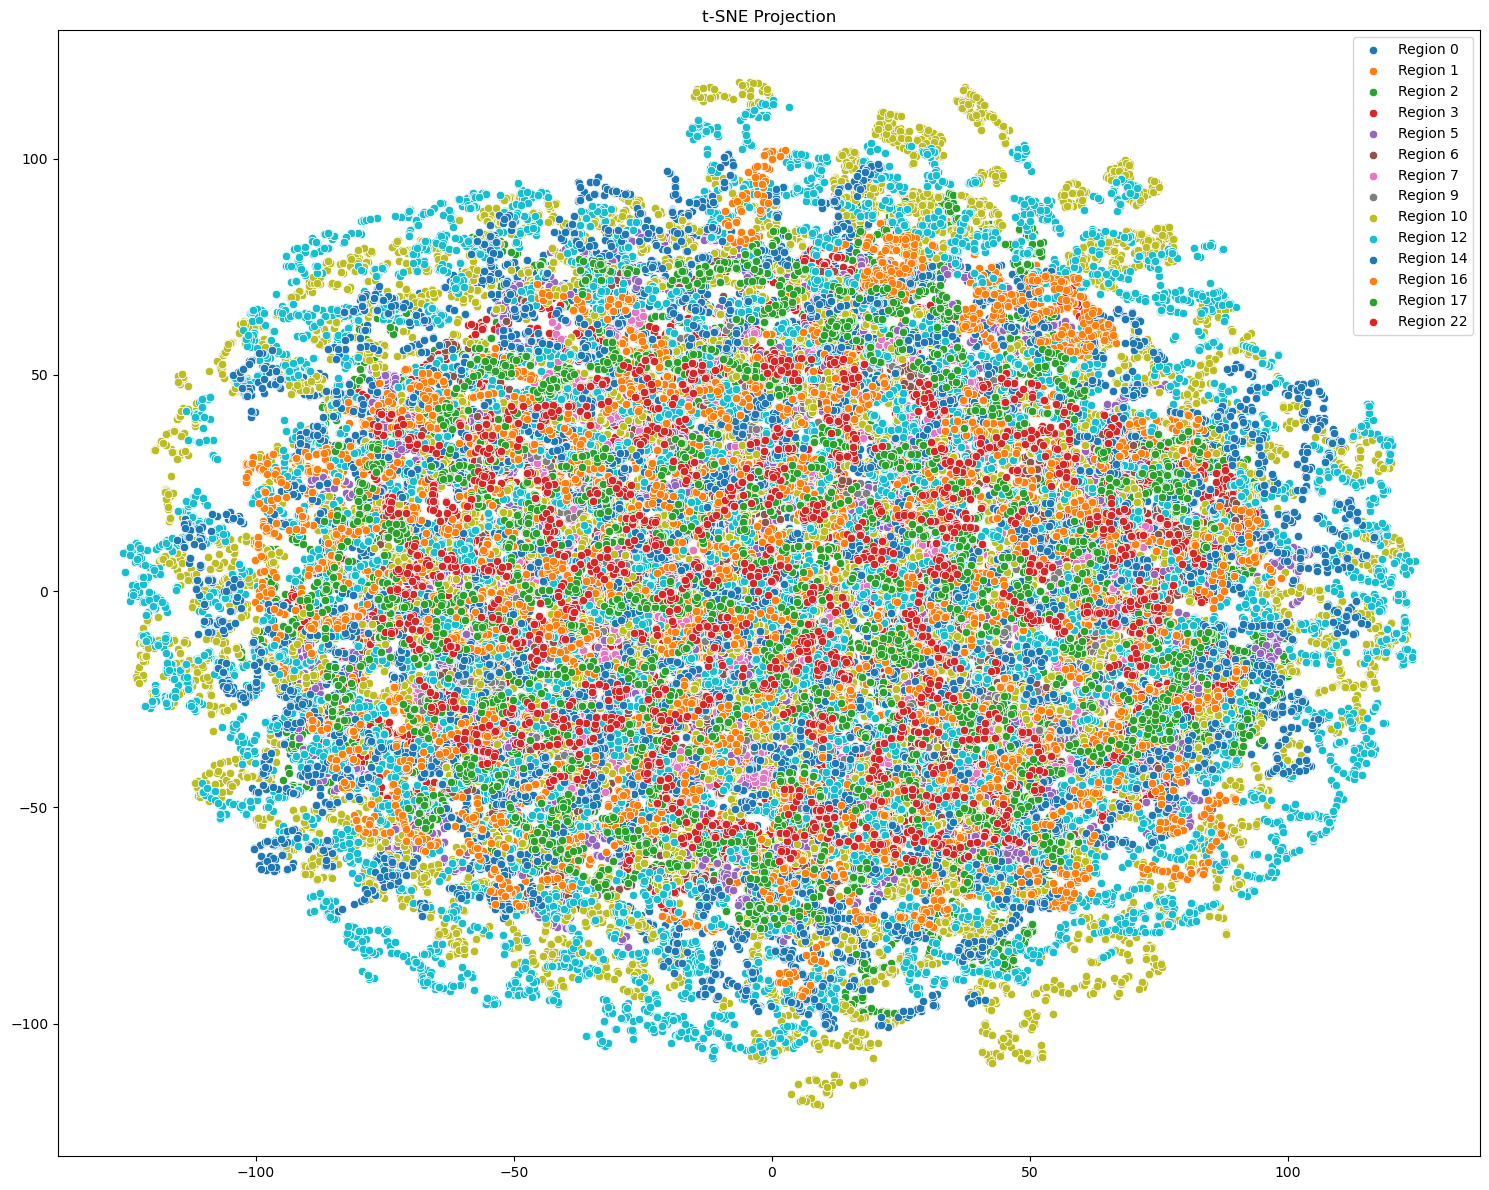

In [4]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances

# Copy the original DataFrame to avoid modifying the original data
df_cluster = df.copy()

# Reverse the label encoding to get the original region names
reverse_mapping = {v: k for k, v in region_map.items()}

# Visualize t-SNE projection for each Order Region with region names
plt.figure(figsize=(15, 12))

for i, region in enumerate(df_cluster['Order Region'].unique()):
    # Create subset DataFrame for the current Order Region
    subset_df = df_cluster[df_cluster['Order Region'] == region].drop(columns=['Order Region'])
    
    # Apply t-SNE for 2D projection
    tsne = TSNE(n_components=2, random_state=42)
    subset_2d_projection = tsne.fit_transform(subset_df)
    
    # Plot the t-SNE projection with region names
    sns.scatterplot(x=subset_2d_projection[:, 0], y=subset_2d_projection[:, 1], label=f'Region {reverse_mapping.get(region, f"Unknown Region {region}")}')
    plt.title(f't-SNE Projection')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


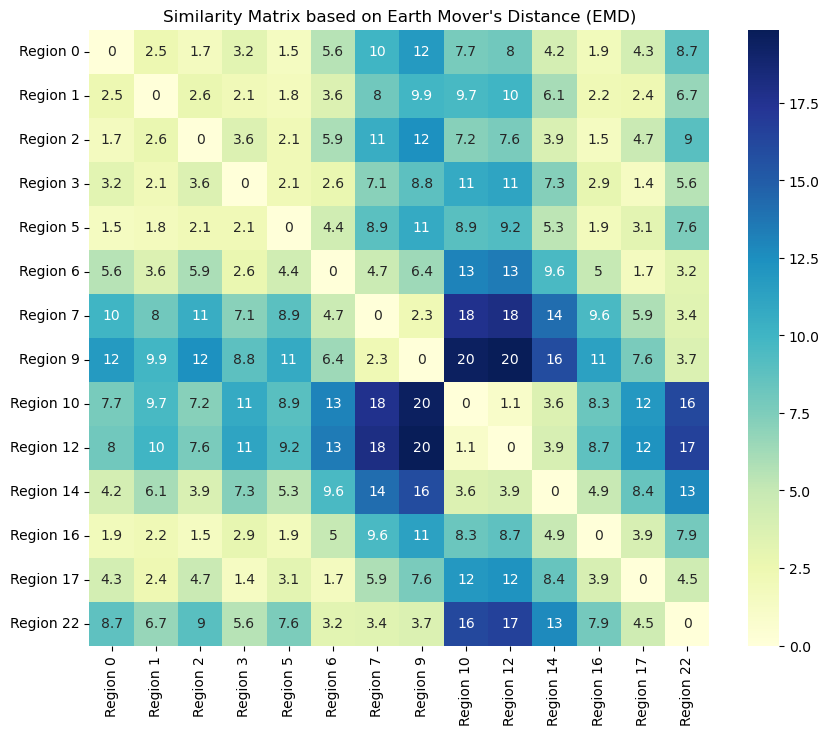

In [5]:
from scipy.stats import wasserstein_distance
import numpy as np

# Function to calculate EMD between two distributions
def calculate_emd(distribution1, distribution2):
    return wasserstein_distance(distribution1, distribution2)

# List to store t-SNE projections for each region
tsne_projections = []

# List to store region names
region_names = []

# Create t-SNE projections and store region names
for i, region in enumerate(df_cluster['Order Region'].unique()):
    # Create subset DataFrame for the current Order Region
    subset_df = df_cluster[df_cluster['Order Region'] == region].drop(columns=['Order Region'])
    
    # Apply t-SNE for 2D projection
    tsne = TSNE(n_components=2, random_state=42)
    subset_2d_projection = tsne.fit_transform(subset_df)
    
    # Store t-SNE projection and region name
    tsne_projections.append(subset_2d_projection)
    region_names.append(f'Region {reverse_mapping.get(region, f"Unknown Region {region}")}')

# Create a similarity matrix based on EMD
num_regions = len(tsne_projections)
similarity_matrix = np.zeros((num_regions, num_regions))

for i in range(num_regions):
    for j in range(i + 1, num_regions):
        emd_value = calculate_emd(tsne_projections[i].flatten(), tsne_projections[j].flatten())
        similarity_matrix[i, j] = emd_value
        similarity_matrix[j, i] = emd_value

# Display the similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap="YlGnBu", xticklabels=region_names, yticklabels=region_names)
plt.title('Similarity Matrix based on Earth Mover\'s Distance (EMD)')
plt.show()


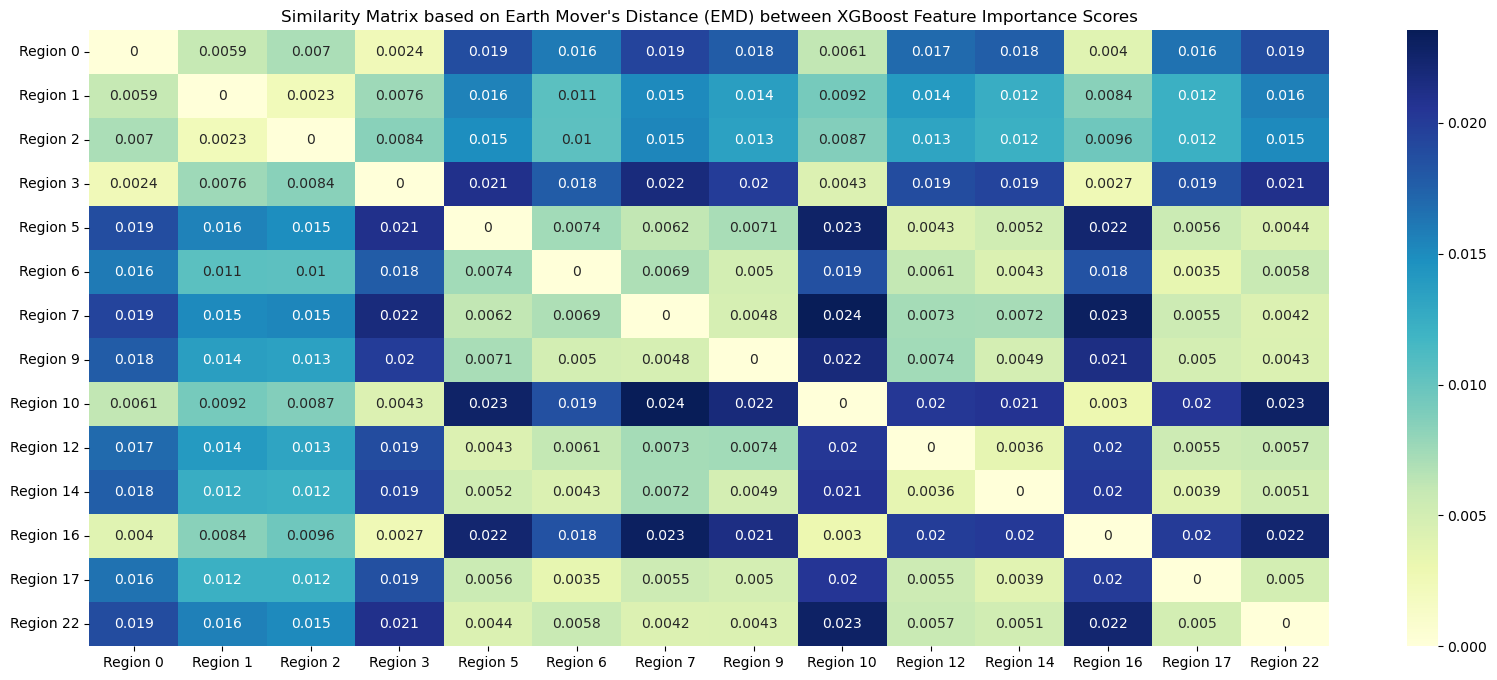

In [7]:
import xgboost as xgb
from scipy.stats import wasserstein_distance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate EMD between two distributions
def calculate_emd(distribution1, distribution2):
    return wasserstein_distance(distribution1, distribution2)

# List to store XGBoost feature importance scores for each region
feature_importance_scores = []

# Create XGBoost models and store feature importance scores
for region in df_cluster['Order Region'].unique():
    # Create subset DataFrame for the current Order Region
    subset_df = df_cluster[df_cluster['Order Region'] == region].drop(columns=['Order Region'])

    # Extract 'Sales' as the target variable
    y = subset_df['Sales'].values

    # Extract other features as predictors
    X = subset_df.drop(columns=['Sales']).values

    # Fit XGBoost model
    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    model.fit(X, y)

    # Store feature importance scores
    feature_importance_scores.append(model.feature_importances_)

# Convert the list of feature importance scores to a NumPy array
feature_importance_scores = np.array(feature_importance_scores)

# Calculate the similarity matrix based on EMD between feature importance scores
num_regions = len(feature_importance_scores)
similarity_matrix_xgboost = np.zeros((num_regions, num_regions))

for i in range(num_regions):
    for j in range(i + 1, num_regions):
        emd_value = calculate_emd(feature_importance_scores[i], feature_importance_scores[j])
        similarity_matrix_xgboost[i, j] = emd_value
        similarity_matrix_xgboost[j, i] = emd_value

# Display the similarity matrix
region_names = [f'Region {reverse_mapping.get(region, f"Unknown Region {region}")}' for region in df_cluster['Order Region'].unique()]
plt.figure(figsize=(20, 8))
sns.heatmap(similarity_matrix_xgboost, annot=True, cmap="YlGnBu", xticklabels=region_names, yticklabels=region_names)
plt.title('Similarity Matrix based on Earth Mover\'s Distance (EMD) between XGBoost Feature Importance Scores')
plt.show()


In [11]:
from itertools import combinations

# Function to calculate average similarity for a sub-dataframe
def calculate_average_similarity(sub_df):
    return np.mean(sub_df)

# Initialize an empty list to store results
sub_df_results = []

# Generate all possible combinations of rows and columns
all_combinations = [(num_rows, rows_combination, num_cols, cols_combination)
                    for num_rows in range(1, similarity_matrix_xgboost.shape[0] + 1)
                    for rows_combination in combinations(range(similarity_matrix_xgboost.shape[0]), num_rows)
                    for num_cols in range(1, similarity_matrix_xgboost.shape[1] + 1)
                    for cols_combination in combinations(range(similarity_matrix_xgboost.shape[1]), num_cols)]

# Sort combinations based on average similarity and pick the top 100
sorted_combinations = sorted(all_combinations, key=lambda x: calculate_average_similarity(similarity_matrix_xgboost[np.ix_(x[1], x[3])]), reverse=True)[:100]

# Create a DataFrame to store the results
for combination in sorted_combinations:
    num_rows, rows_combination, num_cols, cols_combination = combination
    sub_df = similarity_matrix_xgboost[np.ix_(rows_combination, cols_combination)]
    avg_similarity = calculate_average_similarity(sub_df)
    
    sub_df_results.append({
        'Rows': rows_combination,
        'Columns': cols_combination,
        'Average Similarity': avg_similarity
    })

sub_df_results_df = pd.DataFrame(sub_df_results)

# Rank the sub-dataframes based on average similarity
sub_df_results_df['Rank'] = sub_df_results_df['Average Similarity'].rank(ascending=False)

# Display the top 100 result DataFrame
print(sub_df_results_df.head(100))


Skipping combination (0, 1, 2) due to insufficient samples.
Skipping combination (0, 1, 3) due to insufficient samples.
Skipping combination (0, 1, 4) due to insufficient samples.
Skipping combination (0, 1, 5) due to insufficient samples.
Skipping combination (0, 1, 6) due to insufficient samples.
Skipping combination (0, 1, 7) due to insufficient samples.
Skipping combination (0, 1, 8) due to insufficient samples.
Skipping combination (0, 1, 9) due to insufficient samples.
Skipping combination (0, 1, 10) due to insufficient samples.
Skipping combination (0, 1, 11) due to insufficient samples.
Skipping combination (0, 1, 12) due to insufficient samples.
Skipping combination (0, 1, 13) due to insufficient samples.
Skipping combination (0, 2, 3) due to insufficient samples.
Skipping combination (0, 2, 4) due to insufficient samples.
Skipping combination (0, 2, 5) due to insufficient samples.
Skipping combination (0, 2, 6) due to insufficient samples.
Skipping combination (0, 2, 7) due t

NameError: name 'tsne_projections_3d' is not defined

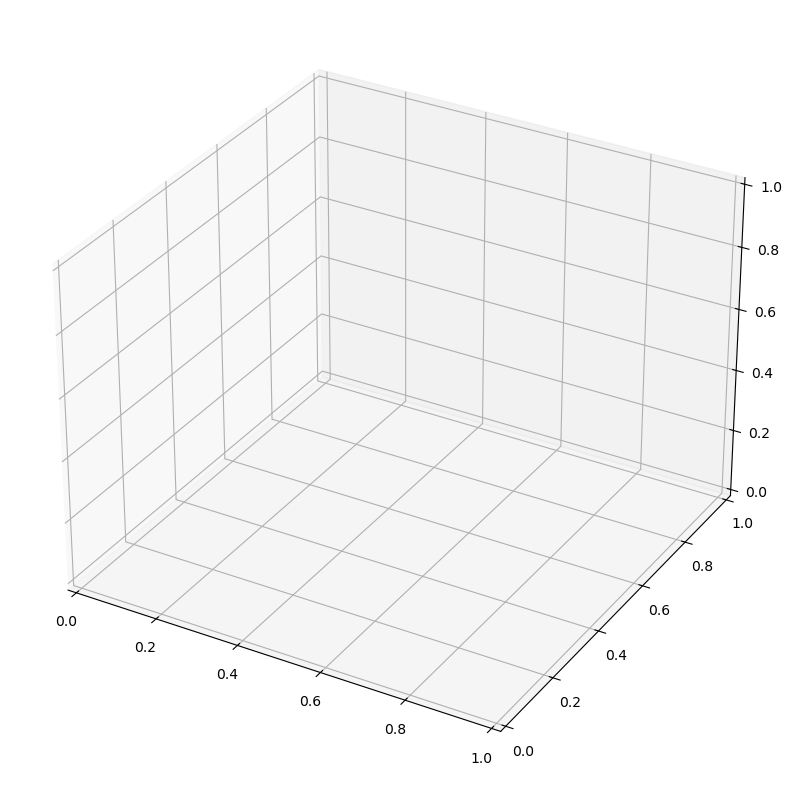

In [8]:
from scipy.spatial import ConvexHull
from itertools import combinations

from scipy.spatial import ConvexHull
from itertools import combinations

from sklearn.covariance import EllipticEnvelope

# Function to calculate the common overlap volume between multiple clients
from sklearn.covariance import EllipticEnvelope

# Function to calculate the common overlap volume between multiple clients
def calculate_common_overlap_volume(feature_importance_scores, indices):
    # Extract feature importance scores for selected clients
    selected_feature_importances = feature_importance_scores[indices, :]

    # Check if there are enough samples
    if selected_feature_importances.shape[0] < selected_feature_importances.shape[1]:
        print(f"Skipping combination {indices} due to insufficient samples.")
        return 0.0

    try:
        # Use Elliptic Envelope to estimate the hyper-ellipsoid for each client
        ellipsoids = [EllipticEnvelope().fit(client.reshape(-1, 1)) for client in selected_feature_importances.T]
    except ValueError as e:
        print(f"Skipping combination {indices} due to the following error:")
        print(e)
        return 0.0

    # Calculate the common overlap volume using the product of individual volumes
    overlap_volume = 1.0
    for ellipsoid in ellipsoids:
        overlap_volume *= ellipsoid.get_inlier_mask().sum() / len(ellipsoid.get_inlier_mask())

    return overlap_volume

# Find the top 10 similar groups
top_similarity_groups = []
top_similarity_values = []

# Iterate over all combinations of 3 clients (you can adjust this for more clients)
for combination in combinations(range(num_regions), 3):
    # Calculate the common overlap volume for the current combination
    overlap_volume = calculate_common_overlap_volume(feature_importance_scores, combination)

    # Store the combination and overlap volume
    top_similarity_groups.append(combination)
    top_similarity_values.append(overlap_volume)

# Get indices of the top 10 similarity values
top_10_indices = np.argsort(top_similarity_values)[-10:]

# Get indices of the top 10 similarity values
top_10_indices = np.argsort(top_similarity_values)[-10:]

# Plot the top 10 similarity groups
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

for idx in top_10_indices:
    similarity_group = top_similarity_groups[idx]

    for i in similarity_group:
        ax.scatter(tsne_projections_3d[i][:, 0], tsne_projections_3d[i][:, 1], tsne_projections_3d[i][:, 2], label=f'Region {region_names[i]}')

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.set_title('Top 10 Similarity Groups based on Common Overlap Volume in 3D')
ax.legend()
plt.show()
